## 1 Import library

In [1]:
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('BostonHousing.csv')

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
score = {}

In [5]:
df.shape

(506, 14)

Predictor features: 

 * CRIM - per capita crime rate by town,

 * ZN - proportion of residential land zoned for lots over 25,000 sq.ft.,

 * INDUS - proportion of non-retail business acres per town.,

 * CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise),

 * NOX - nitric oxides concentration (parts per 10 million),

 * RM - average number of rooms per dwelling,

 * AGE - proportion of owner-occupied units built prior to 1940,

 * DIS - weighted distances to five Boston employment centres

 * RAD - index of accessibility to radial highways,

 * TAX - full-value property-tax rate per \$10000,

 * PTRATIO - pupil-teacher ratio by town,

 * B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town,

 * LSTAT - % lower status of the population,


Target feature

 * MEDV - Median value of owner-occupied homes in $1000's

<AxesSubplot:xlabel='medv', ylabel='Count'>

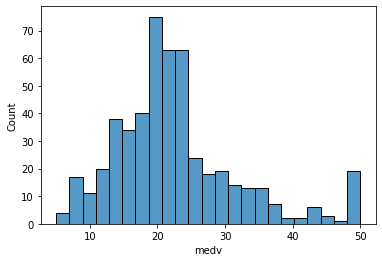

In [6]:
sns.histplot(df.medv)

In [7]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [8]:
df.corr()["medv"].sort_values()

lstat     -0.737663
ptratio   -0.507787
indus     -0.483725
tax       -0.468536
nox       -0.427321
crim      -0.388305
rad       -0.381626
age       -0.376955
chas       0.175260
dis        0.249929
b          0.333461
zn         0.360445
rm         0.695360
medv       1.000000
Name: medv, dtype: float64

The following two predictors are the most correlated features with the target variable MEDV:

LSTAT

RM


# First prediction

In [9]:
lr = LinearRegression()

In [10]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
# 1 predictor, RM
X=df[["rm"]]
# target
Y=df["medv"]

In [12]:
lr.fit(X,Y)

LinearRegression()

In [13]:
Y_pred = lr.predict(X)

In [14]:
s = lr.score(X, Y)

In [15]:
s

0.48352545599133423

In [16]:
mse = mean_squared_error(
    y_true=Y,
    y_pred=lr.predict(X)
)

In [17]:
mse

43.60055177116956

In [18]:
score['score1'] = s
score['mean_squared_error1'] = mse

In [19]:
score

{'score1': 0.48352545599133423, 'mean_squared_error1': 43.60055177116956}

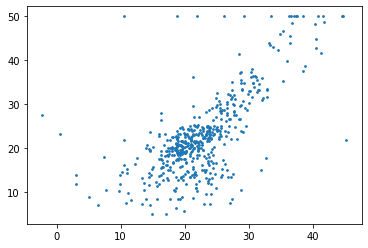

In [20]:
plt.scatter(lr.predict(X), Y, s=3)

# Second prediction

In [21]:
model = LinearRegression()

In [22]:
# 2 predictor, RM
X=df[["rm", "lstat"]]
# target
Y=df["medv"]

In [23]:
model.fit(X,Y)

LinearRegression()

In [24]:
sm = model.score(X, Y)

In [25]:
sm

0.6385616062603403

In [26]:
mqe_m = mean_squared_error(
    y_true=Y,
    y_pred=model.predict(X)
)

In [27]:
mqe_m

30.51246877729947

In [28]:
score['score2'] = sm
score['mean_squared_error2'] = mqe_m

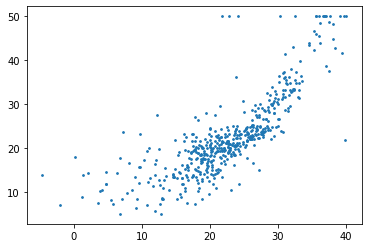

In [29]:
plt.scatter(model.predict(X),Y, s=3)

# Many predictors

In [30]:
# all predictors but the MEDV
X=df.drop("medv", axis=1)
# target
Y=df["medv"]

In [31]:
model2 = LinearRegression()

In [32]:
model2.fit(X,Y)

LinearRegression()

In [33]:
s2 = model2.score(X,Y)

In [34]:
s2

0.7406426641094094

In [35]:
mse_2 = mean_squared_error(
    y_true=Y,
    y_pred=model2.predict(X)
)

In [36]:
mse_2

21.894831181729206

In [37]:
score['score3'] = s2
score['mean_squared_error3'] = mse_2

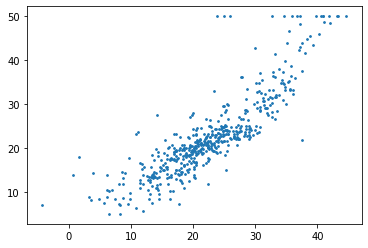

In [38]:
plt.scatter(model2.predict(X), Y, s=3)

In [39]:
score

{'score1': 0.48352545599133423,
 'mean_squared_error1': 43.60055177116956,
 'score2': 0.6385616062603403,
 'mean_squared_error2': 30.51246877729947,
 'score3': 0.7406426641094094,
 'mean_squared_error3': 21.894831181729206}

The best prediction is mdev and RM